# Logistic Regression Classifier

In [12]:
import sklearn.datasets as data
import sklearn.model_selection as model_select
import sklearn.linear_model as linear_model
from scripts.metrics_helper import compute_metrics

iris = data.load_iris()

X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_select.train_test_split(X[:, :2], y, random_state = 0)

logistic_regression = linear_model.LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
logistic_regression.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score: 0.7894736842105263
Training score: 0.8392857142857143
Test score: 0.7894736842105263
Accuracy: 0.7894736842105263
Precision per class: [1.         0.78571429 0.54545455]
Recall per class: [1.         0.6875     0.66666667]
F1-score per class: [1.         0.73333333 0.6       ]


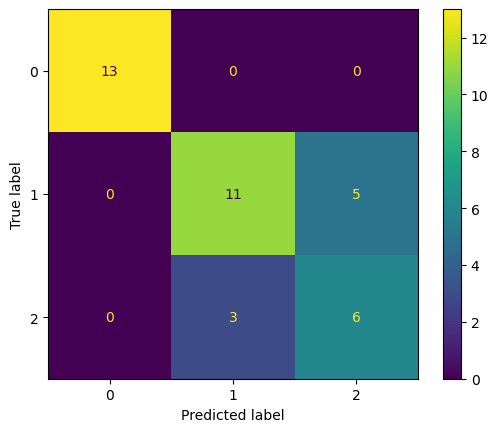

In [13]:
compute_metrics(logistic_regression, X_test, y_test, X_train, y_train)

Mesh score: 1.0


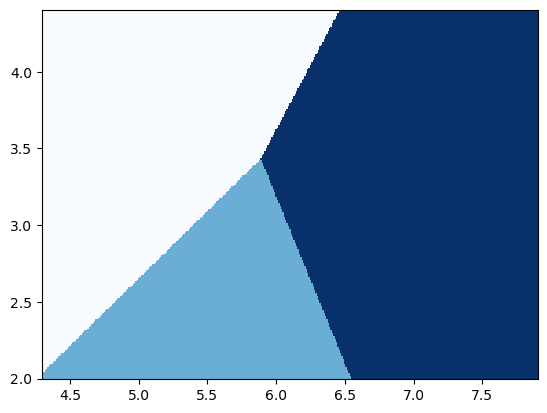

In [14]:
import numpy as np
import matplotlib.pyplot as plt

step_size = 0.01
min_x = 4.3
max_x = 7.9
min_y = 2.0
max_y = 4.4
x = np.arange(min_x, max_x, step_size)
y = np.arange(min_y, max_y, step_size)
num_x = len(y)
num_y = len(x)

x_mesh, y_mesh = np.meshgrid(x, y)
X_pairs = []
for i in range(0, len(y)):
    for j in range(0, len(x)):
        X_pairs.append([x_mesh[i][j], y_mesh[i][j]])
        
y_pred_pairs = logistic_regression.predict(X_pairs)
print(f'Mesh score: {logistic_regression.score(X_pairs, y_pred_pairs)}')

y_pred_mesh = y_pred_pairs.reshape(x_mesh.shape)
plt .set_cmap('Blues')
plt.pcolormesh(x_mesh, y_mesh, y_pred_mesh)
plt.show()


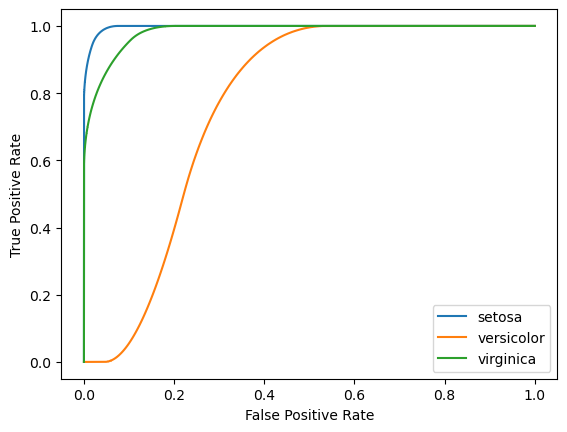

In [15]:
import sklearn.preprocessing as preprocess
import sklearn.metrics as metrics
%matplotlib inline

conf_scores = logistic_regression.decision_function(X_pairs)
y = iris.target
y_binary = preprocess.label_binarize(y_pred_pairs, classes=sorted(set(y)))

false_positive_rate = dict()
true_positive_rate = dict()

num_classes = 3
for c in range(num_classes):
    false_positive_rate[c], true_positive_rate[c], _ = metrics.roc_curve(y_binary[:, c], conf_scores[:, c])

for c in range(num_classes):
    plt.plot(false_positive_rate[c], true_positive_rate[c], label=iris.target_names[c])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])